In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Alternatives'), 75, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-04-25 to 2019-07-09 - 12


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

11


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
RWX,47,0.348162,0.919676,0.335422,3.087570,1.910171
XLRE,47,0.652812,1.945931,0.315083,7.277854,4.835459
VNQI,47,0.323594,1.054484,0.269242,2.541756,2.604699
REET,47,0.434024,1.491494,0.264394,4.525741,3.361345
ICF,47,0.563381,1.988252,0.263396,6.416970,4.991450
VNQ,47,0.511124,1.935603,0.243563,5.791735,5.135487
RWO,47,0.374915,1.388569,0.241423,4.202461,3.132428
IYR,47,0.496479,1.941529,0.235277,5.772041,4.963136
USRT,47,0.467350,1.985754,0.215368,5.345936,5.198662


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted VNQI 0.806 0.503
retry backlogs ['IYR', 'VNQ', 'RWR', 'SCHH', 'RWO', 'USRT', 'ICF', 'REET'] at 0.905/-0.51 - 0.37
retry backlogs ['IYR', 'VNQ', 'RWR', 'SCHH', 'RWO', 'USRT', 'ICF', 'REET'] at 0.910/-0.52 - 0.37
retry backlogs ['IYR', 'VNQ', 'RWR', 'SCHH', 'RWO', 'USRT', 'ICF', 'REET'] at 0.915/-0.53 - 0.37
retry backlogs ['IYR', 'VNQ', 'RWR', 'SCHH', 'RWO', 'USRT', 'ICF', 'REET'] at 0.920/-0.54 - 0.37
retry backlogs ['IYR', 'VNQ', 'RWR', 'SCHH', 'RWO', 'USRT', 'ICF', 'REET'] at 0.925/-0.55 - 0.37
retry backlogs ['IYR', 'VNQ', 'RWR', 'SCHH', 'RWO', 'USRT', 'ICF', 'REET'] at 0.930/-0.56 - 0.37
retry backlogs ['IYR', 'VNQ', 'RWR', 'SCHH', 'RWO', 'USRT', 'ICF', 'REET'] at 0.935/-0.57 - 0.37
retry backlogs ['IYR', 'VNQ', 'RWR', 'SCHH', 'RWO', 'USRT', 'ICF', 'REET'] at 0.940/-0.58 - 0.37
retry backlogs ['IYR', 'VNQ', 'RWR', 'SCHH', 'RWO', 'USRT', 'ICF', 'REET'] at 0.945/-0.59 - 0.37
retry backlogs ['IYR', 'VNQ', 'RWR', 'SCHH', 'RWO', 'USRT', 'ICF', 'REET'] at 0.950/-0.60 - 0.37
retry

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,47.0,0.416473,1.026955,-1.722090,-0.390210,0.289438,1.158607,2.454438,0.366901,4.047145,1.722090
RWX,47.0,0.348162,0.919676,-1.656313,-0.384105,0.207638,1.034150,2.321985,0.335422,3.087570,1.910171
XLRE,47.0,0.652812,1.945931,-4.263532,-0.643475,0.774785,2.125671,4.319119,0.315083,7.277854,4.835459


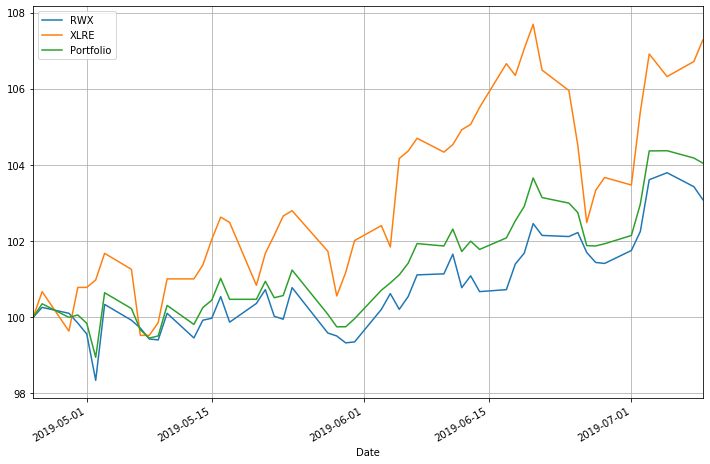

In [4]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(.1)
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)